In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
from tqdm import tqdm

matplotlib.rcParams['pdf.fonttype'] = 42
sb.set()
tqdm.pandas()

C:\Users\serce\Anaconda3\envs\behaviour-switching\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
csv_folder = r'J:\Alja Podgornik\Multimaze arena\Cohort 1_June 2020\all_videos\processed\withROIs\cleaned'

if os.path.exists(os.path.join(csv_folder, 'combined.h5')):
    print('combined.h5 found in', csv_folder, '\nloading the data..')
    df = pd.read_hdf(os.path.join(csv_folder, 'combined.h5'), key='combined')
else:
    # Prepare the ordered categorical data types
    group_dtype = pd.CategoricalDtype(categories=['chr', 'ctrl', 'hr'], ordered=True)
    zone_dtype = pd.CategoricalDtype(categories=['drinking', 'social', 'marble', 'nest',
                                                 'eating', 'interzone', 'unclassified'], ordered=True)
    period_dtype = pd.CategoricalDtype(categories=['q1', 'q2', 'q3', 'q4'], ordered=True)

    dtypes = {'animal':'category', 'group':group_dtype, 'day':'category', 'zone':zone_dtype, 'bout_zone':zone_dtype,
              'time':'float', 'period': period_dtype, 'opto':'bool', 'cum_dist_cm':'float', 'bout_duration':'float',
              'bout_velocity':'float'}

    csv_folder = r'J:\Alja Podgornik\Multimaze arena\Cohort 1_June 2020\all_videos\processed\withROIs\cleaned'
    data = {}

    for file in os.listdir(csv_folder):
        if file.endswith('clean.csv'):
            data[file] = pd.read_csv(os.path.join(csv_folder, file), index_col=0, dtype=dtypes)
            if len(data[file]) < 100000:
                del data[file]

    df = pd.concat(data.values())
    df.to_hdf(os.path.join(csv_folder, 'combined.h5'), key='combined', format='table')
    df.to_csv(os.path.join(csv_folder, 'combined.csv'))

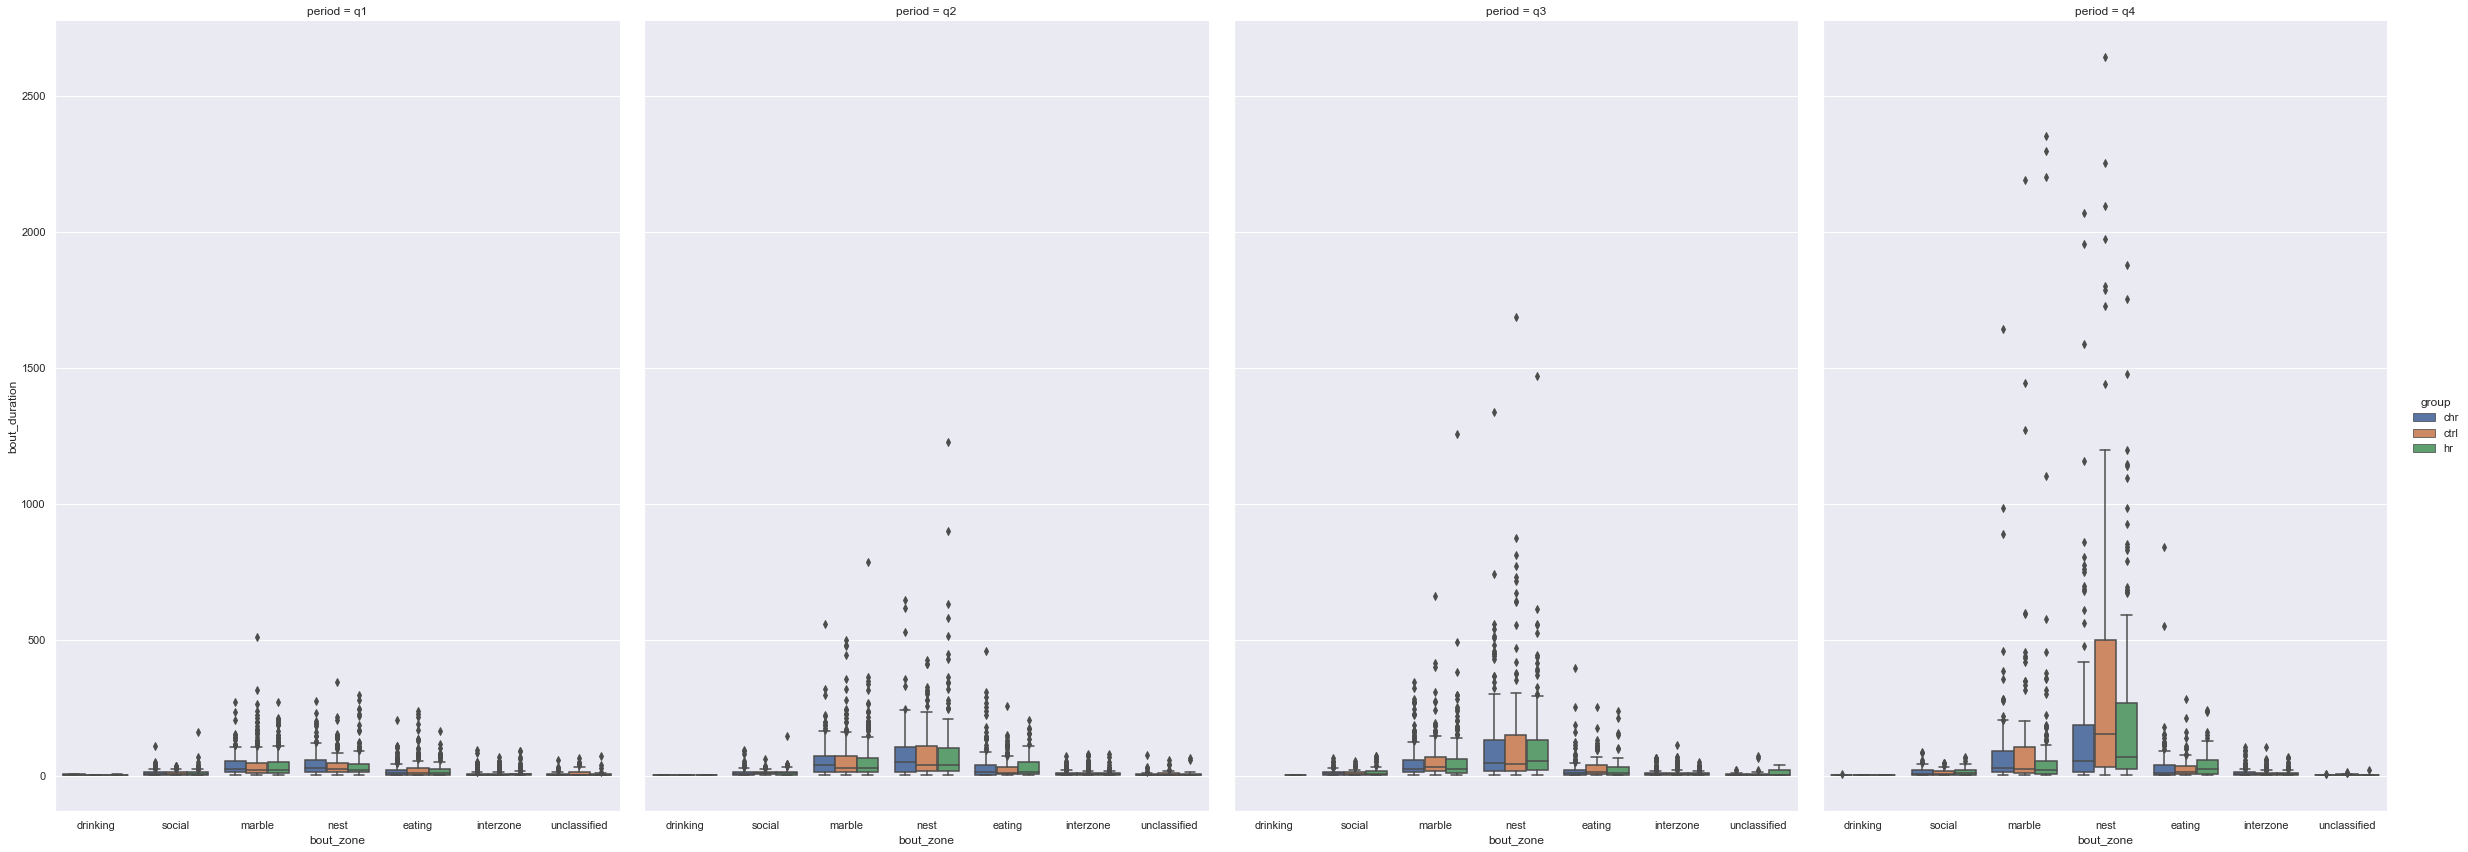

In [3]:
sb.catplot(x='bout_zone', y='bout_duration', hue='group', kind='box', data=df, height=12, aspect=0.7, col='period')